Install and Import Libraries

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import seaborn as sns
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest, RFE
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, RidgeCV, LassoCV, Ridge, Lasso

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to the right directory

In [2]:
!pwd
!ls

/content
drive  sample_data


In [3]:
cd drive/My\ Drive/Colab\ Notebooks/NumeroData

/content/drive/My Drive/Colab Notebooks/NumeroData


In [4]:
pwd

'/content/drive/My Drive/Colab Notebooks/NumeroData'

In [5]:
ls

DC_Properties_trimmed.csv


In [6]:
# # upload data file
# files.upload()

In [7]:
ls

DC_Properties_trimmed.csv


Import Data

In [8]:
data_raw = pd.read_csv('DC_Properties_trimmed.csv')

Data Initial Exploration

In [9]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28900 entries, 0 to 28899
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BATHRM              28900 non-null  int64  
 1   HF_BATHRM           28900 non-null  int64  
 2   HEAT                28900 non-null  object 
 3   AC                  28900 non-null  object 
 4   NUM_UNITS           28900 non-null  int64  
 5   ROOMS               28900 non-null  int64  
 6   BEDRM               28900 non-null  int64  
 7   AYB                 28900 non-null  int64  
 8   YR_RMDL             28900 non-null  int64  
 9   EYB                 28900 non-null  int64  
 10  STORIES             28900 non-null  float64
 11  SALEDATE            28900 non-null  object 
 12  PRICE               28900 non-null  int64  
 13  QUALIFIED           28900 non-null  object 
 14  SALE_NUM            28900 non-null  int64  
 15  GBA                 28900 non-null  int64  
 16  BLDG

In [10]:
data_raw.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BATHRM,28900,NaN,NaN,NaN,2.33381,1.0387,0,2,2,3,11
HF_BATHRM,28900,NaN,NaN,NaN,0.662007,0.588201,0,0,1,1,11
HEAT,28900,14,Forced Air,12771,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AC,28900,3,Y,24111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NUM_UNITS,28900,NaN,NaN,NaN,1.26125,0.63573,0,1,1,1,6
ROOMS,28900,NaN,NaN,NaN,7.50287,2.31977,0,6,7,8,31
BEDRM,28900,NaN,NaN,NaN,3.48232,1.16068,0,3,3,4,20
AYB,28900,NaN,NaN,NaN,1922.56,22.3399,1754,1908,1923,1938,2015
YR_RMDL,28900,NaN,NaN,NaN,2004.26,17.1834,20,2002,2008,2012,2018
EYB,28900,NaN,NaN,NaN,1969.13,10.5478,1915,1964,1967,1972,2017


In [11]:
data_raw['PRICE'].mean()

654932.2866435986

In [12]:
data_raw.head().T

,0,1,2,3,4
BATHRM,4,3,3,3,3
HF_BATHRM,0,1,1,1,1
HEAT,Warm Cool,Hot Water Rad,Hot Water Rad,Hot Water Rad,Warm Cool
AC,Y,Y,Y,Y,Y
NUM_UNITS,2,2,2,2,2
ROOMS,8,9,8,8,7
BEDRM,4,5,5,4,3
AYB,1910,1910,1900,1906,1908
YR_RMDL,1988,2009,2003,2011,2008
EYB,1972,1984,1984,1972,1967


In [13]:
data_raw.tail()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
28895,3,0,Forced Air,N,3,13,8,1953,2016,1971,2.0,11/20/2000,118000,U,1,1600,1,2 Story,Multi,Average,Good,Common Brick,Built Up,Hardwood,3,0,23,5311,7/22/2018,Residential,4738 SOUTH CAPITOL TERRACE SW,WASHINGTON,DC,20032,18S UH 25768 98918,38.821822,-77.006996,Congress Heights,016 A Congress Heights,10900,010900 2000,Ward 8,6254,-77.006347,38.821799,SW
28896,3,0,Forced Air,N,3,14,6,1953,1999,1971,3.0,11/20/2000,1,U,1,2150,1,3 Story,Multi,Average,Average,Common Brick,Built Up,Hardwood,3,0,23,7811,7/22/2018,Residential,4734 SOUTH CAPITOL TERRACE SW,WASHINGTON,DC,20032,18S UH 25768 98925,38.821888,-77.006997,Congress Heights,016 A Congress Heights,10900,010900 2000,Ward 8,6254,-77.006347,38.821799,SW
28897,2,0,Forced Air,Y,2,10,4,1953,2017,1971,2.0,6/27/2016,185000,U,3,1600,1,2 Story,Multi,Average,Very Good,Common Brick,Built Up,Hardwood,2,0,23,5302,7/22/2018,Residential,111 JOLIET STREET SW,WASHINGTON,DC,20032,18S UH 25851 98915,38.821813,-77.006034,Congress Heights,016 A Congress Heights,10900,010900 2000,Ward 8,6254,-77.006347,38.821799,SW
28898,2,0,Forced Air,N,2,10,4,1953,2017,1971,2.0,7/27/2017,215000,U,4,1600,1,2 Story,Multi,Average,Good,Common Brick,Comp Shingle,Hardwood,2,0,23,3046,7/22/2018,Residential,135 JOLIET STREET SW,WASHINGTON,DC,20032,18S UH 25807 98865,38.821356,-77.006528,Congress Heights,016 A Congress Heights,10900,010900 2000,Ward 8,6254,-77.006347,38.821799,SW
28899,2,0,Forced Air,Y,2,10,4,1953,2018,1971,2.0,11/8/2017,140000,U,2,1600,1,2 Story,Multi,Average,Very Good,Common Brick,Comp Shingle,Hardwood,2,0,23,5098,7/22/2018,Residential,139 JOLIET STREET SW,WASHINGTON,DC,20032,18S UH 25804 98859,38.821300,-77.006571,Congress Heights,016 A Congress Heights,10900,010900 2000,Ward 8,6254,-77.006347,38.821799,SW


In [14]:
data = data_raw.copy()

In [15]:
# Are there any null values? 
data.isnull().sum()

BATHRM                0
HF_BATHRM             0
HEAT                  0
AC                    0
NUM_UNITS             0
ROOMS                 0
BEDRM                 0
AYB                   0
YR_RMDL               0
EYB                   0
STORIES               0
SALEDATE              0
PRICE                 0
QUALIFIED             0
SALE_NUM              0
GBA                   0
BLDG_NUM              0
STYLE                 0
STRUCT                0
GRADE                 0
CNDTN                 0
EXTWALL               0
ROOF                  0
INTWALL               0
KITCHENS              0
FIREPLACES            0
USECODE               0
LANDAREA              0
GIS_LAST_MOD_DTTM     0
SOURCE                0
FULLADDRESS           0
CITY                  0
STATE                 0
ZIPCODE               0
NATIONALGRID          0
LATITUDE              0
LONGITUDE             0
ASSESSMENT_NBHD       0
ASSESSMENT_SUBNBHD    0
CENSUS_TRACT          0
CENSUS_BLOCK          0
WARD            

In [16]:
# Are there any duplicated values?
data.duplicated().sum()

0

First thing first; splitting the data!

In [17]:
print(data.shape)
temp_train = data.shape[0]*0.8
print('temp_train:',temp_train)
temp_valid = data.shape[0]*0.2
print('temp_valid:',temp_valid)
temp_test = data.shape[0]*0.2
print('temp_test :',temp_test)

(28900, 46)
temp_train: 23120.0
temp_valid: 5780.0
temp_test : 5780.0


In [18]:
# user inputs
targetName = 'PRICE'
test_size  = 0.2
valid_size = 0.2  # 0.25

X = data.drop(labels=targetName, axis=1)
y = data[targetName]

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=test_size, random_state=1)

X_train, X_valid, y_train, y_valid = \
train_test_split(X_train, y_train, test_size=(valid_size/(1-test_size)), random_state=1) # 0.2/0.8 = 0.25 --> which is 0.2 of the whole data set (0.25 x 0.8 = 0.2)

y_train = pd.DataFrame(data=y_train, columns=[targetName])
y_valid = pd.DataFrame(data=y_valid, columns=[targetName])
y_test  = pd.DataFrame(data=y_test, columns=[targetName])


# reset indicies
X_train = X_train.reset_index(drop=True)#, inplace=True)
X_valid = X_valid.reset_index(drop=True)#, inplace=True)
X_test  = X_test.reset_index(drop=True)#, inplace=True)

y_train = y_train.reset_index(drop=True)#, inplace=True)
y_valid = y_valid.reset_index(drop=True)#, inplace=True)
y_test  = y_test.reset_index(drop=True)#, inplace=True)

print()
print('data.shape   :', data.shape)
print()
print('X_train.shape:', X_train.shape, 'of type', type(X_train))
print('X_valid.shape:', X_valid.shape, 'of type', type(X_valid))
print('X_test.shape :', X_test.shape, 'of type', type(X_test))
print()
print('y_train.shape:', y_train.shape, 'of type', type(y_train))
print('y_valid.shape:', y_valid.shape, 'of type', type(y_valid))
print('y_test.shape :', y_test.shape, 'of type', type(y_test))
print()





data.shape   : (28900, 46)

X_train.shape: (17340, 45) of type <class 'pandas.core.frame.DataFrame'>
X_valid.shape: (5780, 45) of type <class 'pandas.core.frame.DataFrame'>
X_test.shape : (5780, 45) of type <class 'pandas.core.frame.DataFrame'>

y_train.shape: (17340, 1) of type <class 'pandas.core.frame.DataFrame'>
y_valid.shape: (5780, 1) of type <class 'pandas.core.frame.DataFrame'>
y_test.shape : (5780, 1) of type <class 'pandas.core.frame.DataFrame'>



**Preprocessing**

Find which features are categoricals and whick ones are numerical

In [19]:
# find fetures types
catFeatNames = []
numFeatNames = []
for i in range(X_train.shape[1]):
  if X_train[X_train.columns[i]].dtypes == 'object':
    catFeatNames.append(X_train.columns[i])
  else:
    numFeatNames.append(X_train.columns[i])

# create a seperate dataframe for each type of features and for target
X_train_cat = X_train[catFeatNames] #pd.DataFrame(data=X_train[catFeatNames])
X_valid_cat = X_valid[catFeatNames]
X_test_cat  = X_test[catFeatNames]

X_train_num = X_train[numFeatNames] #pd.DataFrame(data=X_train[numFeatNames])
X_valid_num = X_valid[numFeatNames]
X_test_num  = X_test[numFeatNames]

print('data sahpe:',data.shape)
print()
print(X_train_cat.shape[1],'categorical features found:')
print(X_train_cat.columns.values)
print()
print(X_train_num.shape[1],'numerical features found:')
print(X_train_num.columns.values)
print()
print('Target name:',y_train.columns.values)
print('Target shape:',y_train.shape)
print('Target dtype:',y_train.dtypes.name)
print()
print('double check:')
print(X_train_cat.shape)
print(X_train_num.shape)
print(y_train.shape, '+')
print('-------------')
print(data.shape)

data sahpe: (28900, 46)

22 categorical features found:
['HEAT' 'AC' 'SALEDATE' 'QUALIFIED' 'STYLE' 'STRUCT' 'GRADE' 'CNDTN'
 'EXTWALL' 'ROOF' 'INTWALL' 'GIS_LAST_MOD_DTTM' 'SOURCE' 'FULLADDRESS'
 'CITY' 'STATE' 'NATIONALGRID' 'ASSESSMENT_NBHD' 'ASSESSMENT_SUBNBHD'
 'CENSUS_BLOCK' 'WARD' 'QUADRANT']

23 numerical features found:
['BATHRM' 'HF_BATHRM' 'NUM_UNITS' 'ROOMS' 'BEDRM' 'AYB' 'YR_RMDL' 'EYB'
 'STORIES' 'SALE_NUM' 'GBA' 'BLDG_NUM' 'KITCHENS' 'FIREPLACES' 'USECODE'
 'LANDAREA' 'ZIPCODE' 'LATITUDE' 'LONGITUDE' 'CENSUS_TRACT' 'SQUARE' 'X'
 'Y']

Target name: ['PRICE']
Target shape: (17340, 1)
Target dtype: None

double check:
(17340, 22)
(17340, 23)
(17340, 1) +
-------------
(28900, 46)


Let's work on the categorical features first

In [20]:
# Get number of uniques in each categorical feature. This is important to decide
# whether a categorical feature should be one-hot-encoded (or, dummied) or just
# simply dropped. 
unique_cat = []
for i in X_train_cat.columns:
  unique_cat.append(len(X_train_cat[i].unique()))

unique_cat_info = pd.DataFrame(data=X_train_cat.columns.values.reshape(-1,1), columns=['Cat Feature Name'])
unique_cat_info.insert(loc=unique_cat_info.shape[1], column='Unique Values', value=unique_cat)
percentages = np.round((np.array(unique_cat)/data.shape[0])*100, 3)
unique_cat_info.insert(loc=unique_cat_info.shape[1], column='compared to the data size (%)', value=percentages)
unique_cat_info = unique_cat_info.sort_values(by='Unique Values')
unique_cat_info


,Cat Feature Name,Unique Values,compared to the data size (%)
15,STATE,1,0.003
14,CITY,1,0.003
12,SOURCE,1,0.003
11,GIS_LAST_MOD_DTTM,1,0.003
3,QUALIFIED,2,0.007
1,AC,3,0.010
21,QUADRANT,4,0.014
7,CNDTN,7,0.024
5,STRUCT,8,0.028
20,WARD,8,0.028


In [21]:
# drop features with only 1 unique valus
print('X_train_cat.shape (before dropping)',X_train_cat.shape)
X_train_cat_dropUnique = X_train_cat
for i in range(X_train_cat.shape[1]):
  uniqueValue = len(X_train_cat[X_train_cat.columns[i]].unique())
  if uniqueValue == 1:
    print("Feature","'",X_train_cat.columns[i],"'","has",uniqueValue ,"unique value(s). Dropping...")
    X_train_cat_dropUnique = X_train_cat_dropUnique.drop(labels=X_train_cat.columns[i], axis=1)

print('X_train_cat.shape (after dropping)',X_train_cat_dropUnique.shape)


X_train_cat.shape (before dropping) (17340, 22)
Feature ' GIS_LAST_MOD_DTTM ' has 1 unique value(s). Dropping...
Feature ' SOURCE ' has 1 unique value(s). Dropping...
Feature ' CITY ' has 1 unique value(s). Dropping...
Feature ' STATE ' has 1 unique value(s). Dropping...
X_train_cat.shape (after dropping) (17340, 18)


In [22]:
# look at the rest of categorical features and their values counts
for i in range(X_train_cat.shape[1]):
  print(X_train_cat[X_train_cat.columns[i]].value_counts())
  print('-------------------')

Forced Air        7615
Hot Water Rad     5454
Warm Cool         3843
Ht Pump            306
Water Base Brd      30
Wall Furnace        25
Elec Base Brd       20
Electric Rad        13
Gravity Furnac      12
Air-Oil              8
No Data              4
Evp Cool             4
Air Exchng           3
Ind Unit             3
Name: HEAT, dtype: int64
-------------------
Y    14490
N     2845
0        5
Name: AC, dtype: int64
-------------------
10/31/2016    19
8/30/2017     19
7/12/2011     19
11/9/2017     18
5/29/2018     17
              ..
11/8/2000      1
5/26/2000      1
7/29/1996      1
11/7/2002      1
2/21/2001      1
Name: SALEDATE, Length: 5027, dtype: int64
-------------------
Q    14413
U     2927
Name: QUALIFIED, dtype: int64
-------------------
2 Story            13550
3 Story             1785
2.5 Story Fin       1006
1 Story              413
1.5 Story Fin        296
2.5 Story Unfin      106
4 Story               92
Split Foyer           26
3.5 Story Fin         25
1.5 Story 

ASSESSMENT_NBHD


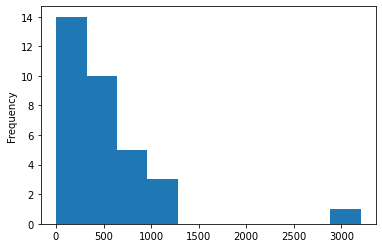

In [23]:
# plot a histogram for any feature
index = 13
print(X_train_cat_dropUnique.columns[index])
X_train_cat_dropUnique[X_train_cat_dropUnique.columns[index]].value_counts().plot.hist()

In [24]:
# drop more categorical features (>= than 22 unique values)
print('X_train_cat_dropUnique.shape (before dropping)',X_train_cat_dropUnique.shape)

for i in range(X_train_cat.shape[1]):
  uniqueValue = len(X_train_cat[X_train_cat.columns[i]].unique())
  if uniqueValue >= 22: #120:
    print("Feature","'",X_train_cat.columns[i],"'","has",uniqueValue ,"unique value(s). Dropping...")
    X_train_cat_dropUnique = X_train_cat_dropUnique.drop(labels=X_train_cat.columns[i], axis=1)

print('X_train_cat.shape (after dropping)',X_train_cat_dropUnique.shape)


X_train_cat_dropUnique.shape (before dropping) (17340, 18)
Feature ' SALEDATE ' has 5027 unique value(s). Dropping...
Feature ' EXTWALL ' has 22 unique value(s). Dropping...
Feature ' FULLADDRESS ' has 17338 unique value(s). Dropping...
Feature ' NATIONALGRID ' has 17335 unique value(s). Dropping...
Feature ' ASSESSMENT_NBHD ' has 33 unique value(s). Dropping...
Feature ' ASSESSMENT_SUBNBHD ' has 120 unique value(s). Dropping...
Feature ' CENSUS_BLOCK ' has 2869 unique value(s). Dropping...
X_train_cat.shape (after dropping) (17340, 11)


In [25]:
# look more at the remaining categorical features
print(len(X_train_cat_dropUnique.columns))
print(X_train_cat_dropUnique.columns)

11
Index(['HEAT', 'AC', 'QUALIFIED', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN', 'ROOF',
       'INTWALL', 'WARD', 'QUADRANT'],
      dtype='object')


In [69]:
# one-hot-encode (or dummy up) categorical features
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train_cat_dropUnique)

X_train_cat_enc = enc.transform(X_train_cat[X_train_cat_dropUnique.columns]).toarray() 
X_train_cat_enc = pd.DataFrame(data=X_train_cat_enc,
                               columns=enc.get_feature_names(X_train_cat_dropUnique.columns))

X_valid_cat_enc = enc.transform(X_valid_cat[X_train_cat_dropUnique.columns]).toarray()
X_valid_cat_enc = pd.DataFrame(data=X_valid_cat_enc,
                               columns=enc.get_feature_names(X_train_cat_dropUnique.columns))

X_test_cat_enc  = enc.transform(X_test_cat[X_train_cat_dropUnique.columns]).toarray()
X_test_cat_enc = pd.DataFrame(data=X_test_cat_enc,
                               columns=enc.get_feature_names(X_train_cat_dropUnique.columns))

print()
print('number of categorical features before one-hot-encoding:',X_train_cat_dropUnique.shape)
print('number of categorical features after one-hot-encoding :',X_train_cat_enc.shape)
print()
print('X_train_cat_enc.shape:',X_train_cat_enc.shape)
print('X_valid_cat_enc.shape:',X_valid_cat_enc.shape)
print('X_test_cat_enc.shape :',X_test_cat_enc.shape)
print()
X_train_cat_enc.head(3)


number of categorical features before one-hot-encoding: (17340, 11)
number of categorical features after one-hot-encoding : (17340, 98)

X_train_cat_enc.shape: (17340, 98)
X_valid_cat_enc.shape: (5780, 98)
X_test_cat_enc.shape : (5780, 98)



,HEAT_Air Exchng,HEAT_Air-Oil,HEAT_Elec Base Brd,HEAT_Electric Rad,HEAT_Evp Cool,HEAT_Forced Air,HEAT_Gravity Furnac,HEAT_Hot Water Rad,HEAT_Ht Pump,HEAT_Ind Unit,HEAT_No Data,HEAT_Wall Furnace,HEAT_Warm Cool,HEAT_Water Base Brd,AC_0,AC_N,AC_Y,QUALIFIED_Q,QUALIFIED_U,STYLE_1 Story,STYLE_1.5 Story Fin,STYLE_1.5 Story Unfin,STYLE_2 Story,STYLE_2.5 Story Fin,STYLE_2.5 Story Unfin,STYLE_3 Story,STYLE_3.5 Story Fin,STYLE_3.5 Story Unfin,STYLE_4 Story,STYLE_Bi-Level,STYLE_Default,STYLE_Split Foyer,STYLE_Split Level,STYLE_Vacant,STRUCT_Default,STRUCT_Multi,STRUCT_Row End,STRUCT_Row Inside,STRUCT_Semi-Detached,STRUCT_Single,...,CNDTN_Good,CNDTN_Poor,CNDTN_Very Good,ROOF_Built Up,ROOF_Clay Tile,ROOF_Comp Shingle,ROOF_Composition Ro,ROOF_Metal- Cpr,ROOF_Metal- Pre,ROOF_Metal- Sms,ROOF_Neopren,ROOF_Shake,ROOF_Shingle,ROOF_Slate,ROOF_Typical,ROOF_Water Proof,INTWALL_Carpet,INTWALL_Ceramic Tile,INTWALL_Default,INTWALL_Hardwood,INTWALL_Hardwood/Carp,INTWALL_Lt Concrete,INTWALL_Parquet,INTWALL_Resiliant,INTWALL_Terrazo,INTWALL_Vinyl Comp,INTWALL_Vinyl Sheet,INTWALL_Wood Floor,WARD_Ward 1,WARD_Ward 2,WARD_Ward 3,WARD_Ward 4,WARD_Ward 5,WARD_Ward 6,WARD_Ward 7,WARD_Ward 8,QUADRANT_NE,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Define some functions

In [67]:
# define a function that finds the outliers
def getOutLiers(data):
  Q1 = np.percentile(data, 25)
  Q3 = np.percentile(data, 75)
  IQR = Q3-Q1
  lowerBound = Q3 - 1.5*IQR
  upperBound = Q3 + 1.5*IQR
  indecies = list(data.index[(data < lowerBound)|(data > upperBound)])
  values = list(data[indecies])

  return indecies, values

In [68]:
# Define histogram plotting function
def plotHist(x):
  plt.hist(x, color='blue', alpha=0.6)
  plt.title("Histogram of '{var_name}'".format(var_name=x.name))
  plt.xlabel("Value")
  plt.ylabel("Frequency")
  plt.show()

Scale numerical features now

In [70]:
scalerX = StandardScaler().fit(X_train_num)
scalerY = StandardScaler().fit(y_train)

X_train_num_scaled = pd.DataFrame(data=scalerX.transform(X_train_num), columns=X_train_num.columns)
X_valid_num_scaled = pd.DataFrame(data=scalerX.transform(X_valid_num), columns=X_valid_num.columns)
X_test_num_scaled  = pd.DataFrame(data=scalerX.transform(X_test_num),  columns=X_test_num.columns)

y_train_scaled = pd.DataFrame(data=scalerY.transform(y_train), columns=y_train.columns)
y_valid_scaled = pd.DataFrame(data=scalerY.transform(y_valid), columns=y_valid.columns)
y_test_scaled  = pd.DataFrame(data=scalerY.transform(y_test) , columns=y_test.columns)


Combine categorical and numerical features into a one dataframe for each dataset

In [71]:
df_train = pd.concat([X_train_cat_enc, X_train_num_scaled, y_train_scaled], 
                           axis=1, 
                           names=[X_train_cat_enc.columns, X_train_num_scaled.columns, y_train_scaled.columns], 
                           ignore_index=False)

df_valid = pd.concat([X_valid_cat_enc, X_valid_num_scaled, y_valid_scaled], 
                           axis=1, 
                           names=[X_valid_cat_enc.columns, X_valid_num_scaled.columns, y_valid_scaled.columns], 
                           ignore_index=False)

df_test  = pd.concat([X_test_cat_enc,  X_test_num_scaled, y_test_scaled], 
                           axis=1, 
                           names=[X_test_cat_enc.columns, X_test_num_scaled.columns, y_test_scaled.columns],   
                           ignore_index=False)

print()
print('df_train.shape:', df_train.shape)
print('df_valid.shape:', df_valid.shape)
print('df_test.shape :', df_test.shape)
print()


df_train.shape: (17340, 122)
df_valid.shape: (5780, 122)
df_test.shape : (5780, 122)



If required, apply PCA

In [32]:
# APPLY_PCA = 0
# if APPLY_PCA == 1:
#   # PCA goes here
#   # Make an instance of the PCA Model
#   pca = PCA(0.95) #(.95)
#   pca.fit(X_train)
#   X_train = pca.transform(X_train)
#   X_test  = pca.transform(X_test)


Let's look at the corrolations

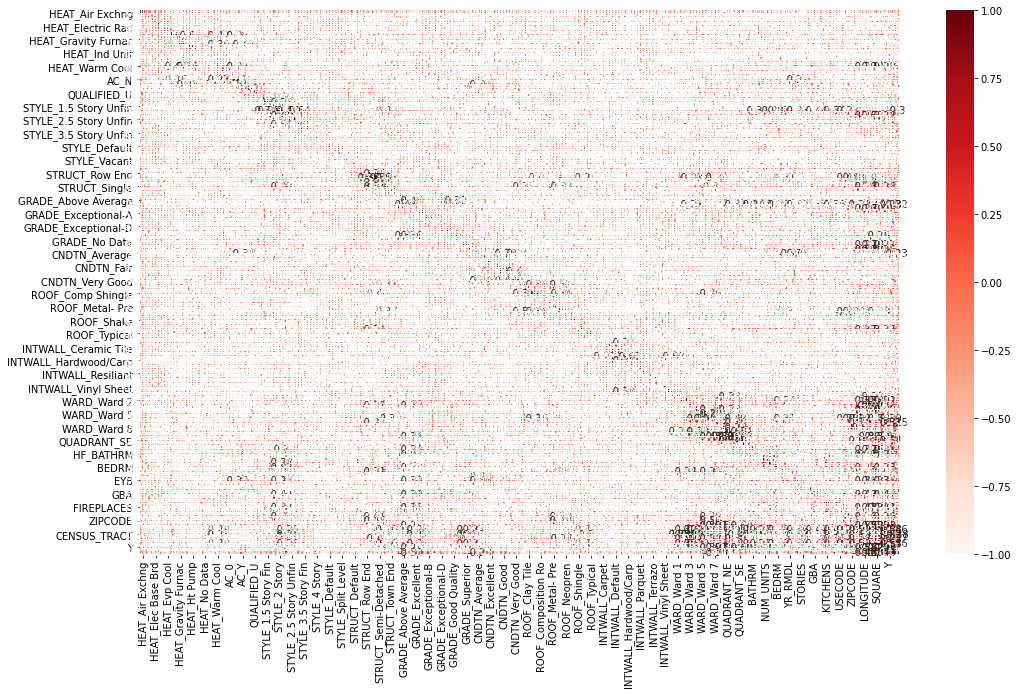

In [72]:
#Using Pearson Correlation
plt.figure(figsize=(17,10))
# corr = df_train.drop(labels=X_train_cat_enc.columns, axis=1).corr()
corr = df_train.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [73]:
#Correlation with output variable
corr_target = abs(corr[targetName])#Selecting highly correlated features
relevant_features = corr_target[corr_target > 0.4]
relevant_features

WARD_Ward 2    0.405225
BATHRM         0.480479
EYB            0.495210
GBA            0.604914
FIREPLACES     0.512758
LONGITUDE      0.455575
X              0.455580
PRICE          1.000000
Name: PRICE, dtype: float64

In [35]:
# EYB: The year an improvement was built more recent than actual year built
# GBA: Gross building area in square feet

In [74]:
corr_2 = df_train[list(relevant_features.keys())].corr()
corr_2 = corr_2.drop(labels=targetName, axis=0)
corr_2 = corr_2.drop(labels=targetName, axis=1)
corr_2

,WARD_Ward 2,BATHRM,EYB,GBA,FIREPLACES,LONGITUDE,X
WARD_Ward 2,1.000000,0.145026,0.284147,0.221331,0.336597,-0.321480,-0.321345
BATHRM,0.145026,1.000000,0.373673,0.667660,0.322528,-0.316948,-0.317052
EYB,0.284147,0.373673,1.000000,0.357108,0.330597,-0.360573,-0.360369
GBA,0.221331,0.667660,0.357108,1.000000,0.493776,-0.420512,-0.420425
FIREPLACES,0.336597,0.322528,0.330597,0.493776,1.000000,-0.405863,-0.406007
LONGITUDE,-0.321480,-0.316948,-0.360573,-0.420512,-0.405863,1.000000,0.999888
X,-0.321345,-0.317052,-0.360369,-0.420425,-0.406007,0.999888,1.000000


In [75]:
corr_2[corr_2 > 0.6]

,WARD_Ward 2,BATHRM,EYB,GBA,FIREPLACES,LONGITUDE,X
WARD_Ward 2,1.0,NaN,NaN,NaN,NaN,NaN,NaN
BATHRM,NaN,1.00000,NaN,0.66766,NaN,NaN,NaN
EYB,NaN,NaN,1.0,NaN,NaN,NaN,NaN
GBA,NaN,0.66766,NaN,1.00000,NaN,NaN,NaN
FIREPLACES,NaN,NaN,NaN,NaN,1.0,NaN,NaN
LONGITUDE,NaN,NaN,NaN,NaN,NaN,1.000000,0.999888
X,NaN,NaN,NaN,NaN,NaN,0.999888,1.000000


In [76]:
selected_features = list(corr_2.drop(labels=['LONGITUDE','BATHRM'], axis=1).columns)
selected_features

['WARD_Ward 2', 'EYB', 'GBA', 'FIREPLACES', 'X']

In [39]:
# selector = SelectKBest(mutual_info_regression, k=100)
# X_train_new = selector.fit_transform(X_train, y_train.ravel())
# X_train_new.shape

In [40]:
# X_test_new = selector.transform(X_test)
# X_test_new.shape

In [77]:
df_train[targetName].shape

(17340,)

Build the model

In [94]:
def buildAndFitTheModel(X_train, y_train):

  # model = SVR(kernel='rbf', gamma='scale', C=3.0, epsilon=0.2)  #smaller C --> underfitting. smaller epsilon --> overfitting
  model = RandomForestRegressor(n_estimators=10, random_state=0)   #(max_depth=2, random_state=0)

  model.fit(X_train, y_train)

  return model


In [95]:
def predictAndEval(model, X_train, X_valid, X_test, y_train, y_valid, y_test, scalerY):
  y_pred_train = model.predict(X_train)
  y_pred_valid = model.predict(X_valid)
  y_pred_test = model.predict(X_test)

  RMSE_train = np.sqrt(mean_squared_error(y_true=scalerY.inverse_transform(y_train), 
                                          y_pred=scalerY.inverse_transform(y_pred_train)))
  MSE_train = mean_squared_error(y_true=scalerY.inverse_transform(y_train), 
                                 y_pred=scalerY.inverse_transform(y_pred_train))

  RMSE_valid = np.sqrt(mean_squared_error(y_true=scalerY.inverse_transform(y_valid), 
                                          y_pred=scalerY.inverse_transform(y_pred_valid)))
  MSE_valid = mean_squared_error(y_true=scalerY.inverse_transform(y_valid),
                                 y_pred=scalerY.inverse_transform(y_pred_valid))

  RMSE_test = np.sqrt(mean_squared_error(y_true=scalerY.inverse_transform(y_test), 
                                         y_pred=scalerY.inverse_transform(y_pred_test)))
  MSE_test = mean_squared_error(y_true=scalerY.inverse_transform(y_test), 
                                y_pred=scalerY.inverse_transform(y_pred_test))

  print('Model Evaluation Metric:')
  print()
  print('RMSE_train($):',np.round(RMSE_train,3))
  print('RMSE_valid($):',np.round(RMSE_valid,3))
  print('RMSE_test ($):',np.round(RMSE_test,3))
  print()
  print('MSE_train:',np.round(MSE_train,3))
  print('MSE_valid:',np.round(MSE_valid,3))
  print('MSE_test :',np.round(MSE_test,3))

  return RMSE_train, RMSE_test, MSE_train, MSE_test

In [44]:
# searchFeatures = ElasticNet(random_state=0, l1_ratio=0.2)
# searchFeatures.fit(X_train, y_train)
# print(searchFeatures.coef_)
# print(searchFeatures.intercept_)

In [96]:
APPLY_FEATURE_SELECTION = 0

if APPLY_FEATURE_SELECTION:
  pass
else:
  selected_features = df_train.columns

X_train = df_train[selected_features].values
X_valid = df_valid[selected_features].values
X_test  = df_test[selected_features].values

y_train = df_train[targetName].values
y_valid = df_valid[targetName].values
y_test  = df_test[targetName].values

model = buildAndFitTheModel(X_train, y_train)
RMSE_train, RMSE_test, MSE_train, MSE_test = predictAndEval(model, X_train, X_valid, X_test, 
                                                            y_train,  y_valid, y_test, scalerY)



Model Evaluation Metric:

RMSE_train($): 29257.739
RMSE_valid($): 164076.99
RMSE_test ($): 28730.703

MSE_train: 856015271.223
MSE_valid: 26921258598.852
MSE_test : 825453272.58


In [47]:
# X_train = df_train.drop(labels=targetName, axis=1).values
# X_valid = df_valid.drop(labels=targetName, axis=1).values
# X_test  = df_test.drop(labels=targetName, axis=1).values

# y_train = df_train[targetName].values
# y_valid = df_valid[targetName].values
# y_test  = df_test[targetName].values

# selector = SelectKBest(mutual_info_regression, k=10)  #ElasticNet(random_state=0, l1_ratio=0.2)
# # selector = SelectKBest(ElasticNet(random_state=0, l1_ratio=0.2), k=5)

# # selector.fit_transform()

# X_train_new = selector.fit_transform(X_train, y_train)
# X_valid_new = selector.transform(X_valid)
# X_test_new  = selector.transform(X_test)
# print(X_train_new.shape)
# print(X_valid_new.shape)
# print(X_test_new.shape)
# print()

# model = buildAndFitTheModel(X_train_new, y_train)

# RMSE_train, RMSE_test, MSE_train, MSE_test = predictAndEval(model, X_train, X_valid, X_test, 
#                                                             y_train,  y_valid, y_test)

TypeError: ignored